In [1]:
# tf 2.4
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import constant, Variable
from tensorflow import GradientTape, multiply

### Defining data as constants
- use constant to transform a numpy array, credit_numpy, into a tensorflow constant, credit_constant. This array contains feature columns from a dataset on credit card holders



In [3]:
credit = pd.read_csv('data/uci_credit_card.csv')
credit = credit[['EDUCATION','MARRIAGE', 'AGE','BILL_AMT1']]
credit.head(3)

,EDUCATION,MARRIAGE,AGE,BILL_AMT1
0,2,1,24,3913.0
1,2,2,26,2682.0
2,2,2,34,29239.0


In [4]:
# convert to numpy array
credit_numpy = np.array(credit)
print(type(credit_numpy))
print(credit_numpy.shape)

<class 'numpy.ndarray'>
(30000, 4)


In [5]:
# Convert the credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy, )

# Print constant datatype
print('\n The datatype is:', credit_constant.dtype)

# Print constant shape
print('\n The shape is:', credit_constant.shape)


 The datatype is: <dtype: 'float64'>

 The shape is: (30000, 4)


### Defining variables
- Unlike a constant, a variable's value can be modified. This will be useful when we want to train a model by updating its parameters.
-  define and print a variable. We'll then convert the variable to a numpy array, print again, and check for differences.

In [6]:
# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print('\n A1: ', A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print('\n B1: ', B1)


 A1:  <tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>

 B1:  [1 2 3 4]


### Performing element-wise multiplication


In [7]:
from tensorflow import multiply, ones_like, matmul

# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1, B1)
C23 = multiply(A23, B23)

# Print the tensors C1 and C23
print('\n C1: {}'.format(C1.numpy()))
print('\n C23: {}'.format(C23.numpy()))


 C1: [1 2 3 4]

 C23: [[1 2 3]
 [1 6 4]]


### Making predictions with matrix multiplication
- We will learn to train linear regression models. This process will yield a vector of parameters that can be multiplied by the input data to generate predictions.
- use input data, features, and a target vector, bill, which are taken from a credit card dataset
- The matrix of input data, features, contains two columns: education level and age. The target vector, bill, is the size of the credit card borrower's bill. 
- **Since we have not trained the model, we will enter a guess for the values of the parameter vector, params. We will then use `matmul()` to perform matrix multiplication of features by params to generate predictions, billpred, which we will compare with bill.**

In [8]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


##### Understanding matrix multiplication will make things simpler when we start making predictions with linear models.

### Reshaping tensors
- In classification models we will classify images of sign language letters using a neural network. In some cases, the network will take 1-dimensional tensors as inputs, but our data will come in the form of images, which will either be either 2- or 3-dimensional tensors, depending on whether they are grayscale or color images.

In [9]:
import cv2
from tensorflow import reshape

gray_tensor = cv2.imread('C:/Users/Shubham/Pictures/0.jpg', 0)
color_tensor = cv2.imread('C:/Users/Shubham/Pictures/1.jpg')
print(gray_tensor.shape, color_tensor.shape)

(1086, 1536) (625, 808, 3)


In [10]:
# Reshape the grayscale image tensor into a vector
gray_vector = reshape(gray_tensor, (1668096, 1))

# Reshape the color image tensor into a vector
color_vector = reshape(color_tensor, (1515000, 1))

### Optimizing with gradients
- We are given a loss function,which we want to minimize. We can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, we can decrease the loss by lowering x. If it is negative, we can decrease it by increasing x. This is how gradient descent works.n practice, we will use a high level tensorflow operation to perform gradient descent automatically.
- compute the slope at x values of -1, 1, and 0.

In [11]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = Variable(x0)
    with GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = multiply(x, x)
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


##### Notice that the slope is positive at x = 1, which means that we can lower the loss by reducing x. The slope is negative at x = -1, which means that we can lower the loss by increasing x. The slope at x = 0 is 0, which means that we cannot lower the loss by either increasing or decreasing x. This is because the loss is minimized at x = 0.

### Loading data using pandas


In [12]:
# Import pandas under the alias pd
import pandas as pd

# Assign the path to a string variable named data_path
data_path = 'data/kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing['price'].head())

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64


### Setting the data type

In [13]:
# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


##### price yielded a numpy array; whereas printing waterfront yielded a tf.Tensor().

### Loss functions in TensorFlow

In [14]:
# Compute the mean squared error (mse)
loss = tf.keras.losses.mse(price, price)

# Print the mean squared error (mse)
print(loss.numpy())

0.0


#####  MAE was much smaller than the MSE, even though price and predictions were the same. This is because the different loss functions penalize deviations of predictions from price differently. MSE does not like large deviations and punishes them harshly.

### Modifying the loss function
- compute the loss within another function called `loss_function()`, which first generates predicted values from the data and variables. The purpose of this is to construct a function of the trainable model variables that returns the loss.
- We can then repeatedly evaluate this function for different variable values until we find the minimum.

In [15]:
# Initialize a variable named scalar
scalar = Variable(1.0, dtype=tf.float32)
features = np.arange(5,10)
targets = np.arange(5)

# Define the model
def model(scalar, features = features):
    return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
    # Compute the predicted values
    predictions = model(scalar, features)
    
    # Return the mean absolute error loss
    return tf.keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

5.0


##### this was the equivalent of evaluating the loss function for a linear regression where the intercept is 0

### Set up a linear regression
- A univariate linear regression identifies the relationship between a single feature and the target tensor.

In [56]:
data = 'data/kc_house_data.csv'
data_pd = pd.read_csv(data)
size_log = np.log(data_pd['sqft_living'].to_numpy())
print(size_arr.shape)
price_log = np.log(data_pd['price'].to_numpy())
print(price_arr.shape)

slope = Variable(0.001, dtype=tf.float32)
intercept = Variable(5.0, dtype=tf.float32)
print(slope, intercept)

(21613,)
(21613,)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.001> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>


In [57]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
    return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
    # Set the predicted values
    predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
    return tf.keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

148.9129569453266
84.30899941394759


In [58]:
# s = "def plot_results(intercept, slope):\n\tsize_range = np.linspace(6,14,100)\n\tprice_pred = [intercept+slope*s for s in size_range]\n\tplt.scatter(size_log, price_log, color = 'black')\n\tplt.plot(size_range, price_pred, linewidth=3.0, color='red')\n\tplt.xlabel('log(size)')\n\tplt.ylabel('log(price)')\n\tplt.title('Scatterplot of data and fitted regression line')\n\tplt.show()\n"
import matplotlib.pyplot as plt

def plot_results(intercept, slope):
    size_range = np.linspace(6,14,100)
    price_pred = [intercept+slope*s for s in size_range]
    plt.scatter(size_log, price_log, color = 'black')
    plt.plot(size_range, price_pred, linewidth=3.0, color='red')
    plt.xlabel('log(size)')
    plt.ylabel('log(price)')
    plt.title('Scatterplot of data and fitted regression line')
    plt.show()

### Train a linear model
- define an optimization operation as opt. We will then train a univariate linear model by minimizing the loss to find the optimal values of intercept and slope

14.347352
8.226627
3.5242996
0.22026886
0.52341217
0.22848657
0.20263977
0.15438245
0.16139136
0.15495746


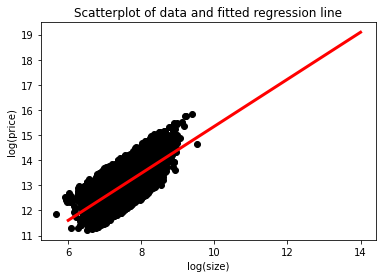

In [59]:
# Initialize an adam optimizer
opt = tf.keras.optimizers.Adam(0.5)

# Apply the .minimize() method to the optimizer
for j in range(100):
    # Apply minimize, pass the loss function, and supply the variables
    opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

    # Print every 10th value of the loss
    if j % 10 == 0:
        print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

### Multiple linear regression
- In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions.
- We will use price_log as our target and size_log and bedrooms as our features.
- We will also switch from using the the mean squared error loss to the mean absolute error loss: `keras.losses.mae()`. Finally, the predicted values are computed as follows: `params[0] + feature1*params[1] + feature2*params[2]`
- Here, params[0] is the intercept and params[1] and params[2] are the slopes.

In [61]:
params = Variable([0.1 , 0.05, 0.02], dtype=tf.float32)
print(params)

bedrooms = data_pd['bedrooms'].to_numpy()

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.1 , 0.05, 0.02], dtype=float32)>


In [65]:
def print_results(params):
    return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'.format(loss_function(params).numpy(), params[0].numpy(), params[1].numpy(), params[2].numpy()))

# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
    return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
    # Set the predicted values
    predictions = linear_regression(params, feature1, feature2)

    # Use the mean absolute error loss
    return tf.keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = tf.keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
    opt.minimize(lambda: loss_function(params), var_list=[params])
    print_results(params)

loss: 12.479, intercept: 0.102, slope_1: 0.052, slope_2: 0.022
loss: 12.467, intercept: 0.103, slope_1: 0.053, slope_2: 0.023
loss: 12.455, intercept: 0.104, slope_1: 0.054, slope_2: 0.024
loss: 12.443, intercept: 0.105, slope_1: 0.055, slope_2: 0.025
loss: 12.431, intercept: 0.106, slope_1: 0.056, slope_2: 0.026
loss: 12.419, intercept: 0.107, slope_1: 0.057, slope_2: 0.027
loss: 12.408, intercept: 0.108, slope_1: 0.058, slope_2: 0.028
loss: 12.396, intercept: 0.109, slope_1: 0.059, slope_2: 0.029
loss: 12.384, intercept: 0.110, slope_1: 0.060, slope_2: 0.030
loss: 12.372, intercept: 0.111, slope_1: 0.061, slope_2: 0.031


##### Note that params[2] tells us how much the price will increase in percentage terms if we add one more bedroom. We could train params[2] and the other model parameters by increasing the number of times we iterate over opt.

### Preparing to batch train
- Before we can train a linear model in batches, we must first define variables, a loss function, and an optimization operation. 


In [5]:
# Define the intercept and slope
intercept = Variable(10.0)
slope = Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
    # Define the predicted values
    return intercept + slope * features

# Define the loss function
def loss_function(intercept, slope, targets, features):
    # Define the predicted values
    predictions = linear_regression(intercept, slope, features)

    # Define the MSE loss
    return tf.keras.losses.mse(targets, predictions)

##### Notice that we did not use default argument values for the `input data, features and targets`. This is because the input data has not been defined in advance. Instead, with batch training, we will load it during the training process.

- we will train a linear regression model in batches
- We will do this by stepping through the dataset in batches and updating the model's variables, intercept and slope, after each step
- This approach will allow us to train with datasets that are otherwise too large to hold in memory
- The trainable variables should be entered into `var_list` in the order in which they appear as loss function arguments

In [6]:
# Initialize adam optimizer
opt = tf.keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('data/kc_house_data.csv', chunksize=100):
    size_batch = np.array(batch['sqft_lot'], np.float32)

    # Extract the price values for the current batch
    price_batch = np.array(batch['price'], np.float32)

    # Complete the loss, fill in the variable list, and minimize
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016


### The linear algebra of dense layers
- There are two ways to define a dense layer in tensorflow. The first involves the use of low-level, linear algebraic operations. The second makes use of high-level keras operations. 
- The input layer contains 3 features -- education, marital status, and age -- which are available as `borrower_features`. The hidden layer contains 2 nodes and the output layer contains a single node.
- For each layer, we will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function.

In [8]:
borrower_features = np.array([[ 2.,  2., 43.]], dtype=np.float32)
borrower_features.shape

(1, 3)

In [13]:
# From previous step
bias1 = Variable(1.0)
weights1 = Variable(tf.ones((3, 2)))
product1 = tf.matmul(borrower_features, weights1)
dense1 = tf.keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(tf.ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = tf.matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = tf.keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 prediction: 0.9525741338729858

 actual: 1


##### Our model produces predicted values in the interval between 0 and 1. For the example we considered, the actual value was 1 and the predicted value was a probability between 0 and 1. This, of course, is not meaningful, since we have not yet trained our model's parameters.